In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)

# 활성화 함수
## 계단 함수 구현

In [2]:
# step_function
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(x)
print(y)

[-1.  1.  2.]
[False  True  True]


In [5]:
y = y.astype(np.int)
print(y)

[0 1 1]


C:\Users\sjy54\AppData\Local\Temp\ipykernel_1768\4147947644.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


## 계단 함수의 그래프

C:\Users\sjy54\AppData\Local\Temp\ipykernel_1768\2630646454.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


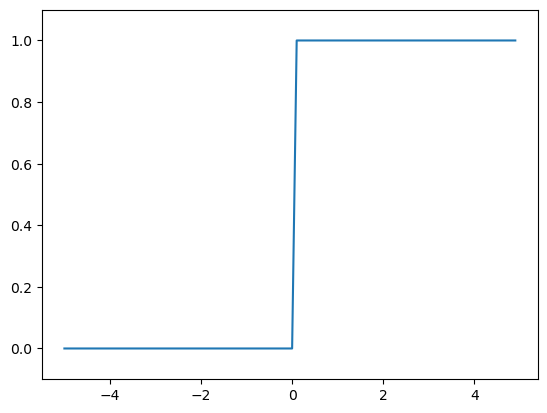

In [6]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

## 시그모이드 함수의 그래프

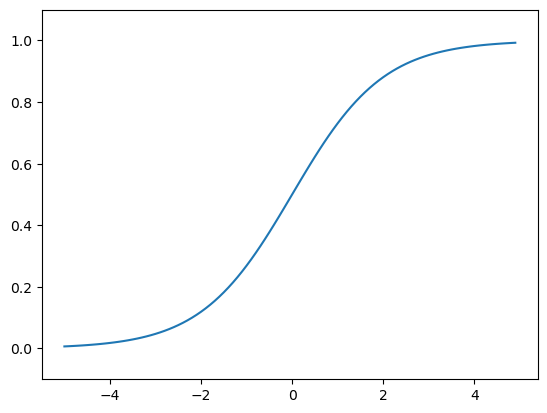

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## ReLU

In [13]:
def relu(x):
    return np.maximum(0, x)

# 3층 신경망 구현하기

## 각 층의 신호 전달 구현하기

In [10]:
# 입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]


In [11]:
# 활성화 함수
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [12]:
# 1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2, Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696] [0.62624937 0.7710107 ]


In [13]:
# 2층에서 출력층으로의 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3, Y)

[0.31682708 0.69627909] [0.31682708 0.69627909]


## 3층 신경망 구현 정리

In [14]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[0.31682708 0.69627909]


# 출력층 설계하기
## 소프트맥스 함수 구현

In [16]:
# 결과를 하나씩 확인하며 진행
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[0.3 2.9 4. ]
[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [17]:
# softmax 함수 구현
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [18]:
# 오버플로우
a = np.array([1010, 1000, 900])
print(np.exp(a)/np.sum(np.exp(a)))

c = np.max(a)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[   0  -10 -110]
[9.99954602e-01 4.53978687e-05 1.68883521e-48]


C:\Users\sjy54\AppData\Local\Temp\ipykernel_1768\2190015839.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a)/np.sum(np.exp(a)))
C:\Users\sjy54\AppData\Local\Temp\ipykernel_1768\2190015839.py:3: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a)/np.sum(np.exp(a)))


In [19]:
# 수정된 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(c - a) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y